In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib 
import yaml
import seaborn as sns

pd.set_option('display.max_rows',100)


In [2]:
with open('/weather_station/config/config.yaml', 'r') as l :
    config = yaml.safe_load(l)
print(config)

{'data_raw': '/weather_station/src/dataweatherstation.csv', 'datetime_cols': ['tanggal'], 'float_columns': ['tekanan_udara'], 'int_cols': ['hujan', 'kelembabpan', 'temperature', 'tingkat_cahaya'], 'target': 'keterangan', 'predictors': ['hujan', 'kelembabpan', 'tekanan_udara', 'temperature', 'tingkat_cahaya']}


In [3]:
weather = pd.read_csv(config['data_raw'])
weather

,id,tanggal,hujan,kelembabpan,tekanan_udara,temperature,tingkat_cahaya,keterangan
0,9470,3/9/2023 1:01,0,98,93657.02,23,0,cerah
1,9469,3/9/2023 1:01,0,98,93656.45,23,0,cerah
2,9490,3/9/2023 1:02,0,98,93656.99,23,0,cerah
3,9489,3/9/2023 1:02,0,98,93656.55,23,0,cerah
4,9488,3/9/2023 1:02,0,98,93657.02,23,0,cerah
...,...,...,...,...,...,...,...,...
49303,88929,3/19/2023 22:14,0,98,93613.57,23,0,cerah
49304,88928,3/19/2023 22:14,0,98,93613.58,23,0,cerah
49305,88927,3/19/2023 22:14,0,98,93613.53,23,0,cerah
49306,88926,3/19/2023 22:14,0,98,93613.22,23,0,cerah


## CLEANSING

In [4]:
weather.isnull().sum()

# TIDAK ADA MISSING VALUES

id                0
tanggal           0
hujan             0
kelembabpan       0
tekanan_udara     0
temperature       0
tingkat_cahaya    0
keterangan        0
dtype: int64

In [5]:
weather.dtypes

id                  int64
tanggal            object
hujan               int64
kelembabpan         int64
tekanan_udara     float64
temperature         int64
tingkat_cahaya      int64
keterangan         object
dtype: object

In [6]:
weather['tanggal'] = pd.to_datetime(weather['tanggal'])

In [7]:
weather.dtypes

id                         int64
tanggal           datetime64[ns]
hujan                      int64
kelembabpan                int64
tekanan_udara            float64
temperature                int64
tingkat_cahaya             int64
keterangan                object
dtype: object

 CHECK TINGKAT CAHAYA NYA 

In [8]:
mask_time = weather['tingkat_cahaya'] > 50

In [9]:
mask = ((weather['tanggal'].dt.hour >= 18) | (weather['tanggal'].dt.hour < 22))

In [10]:
mask_drop = mask_time & mask


In [11]:
weather = weather.drop(weather[mask_drop].index)
weather

,id,tanggal,hujan,kelembabpan,tekanan_udara,temperature,tingkat_cahaya,keterangan
0,9470,2023-03-09 01:01:00,0,98,93657.02,23,0,cerah
1,9469,2023-03-09 01:01:00,0,98,93656.45,23,0,cerah
2,9490,2023-03-09 01:02:00,0,98,93656.99,23,0,cerah
3,9489,2023-03-09 01:02:00,0,98,93656.55,23,0,cerah
4,9488,2023-03-09 01:02:00,0,98,93657.02,23,0,cerah
...,...,...,...,...,...,...,...,...
49303,88929,2023-03-19 22:14:00,0,98,93613.57,23,0,cerah
49304,88928,2023-03-19 22:14:00,0,98,93613.58,23,0,cerah
49305,88927,2023-03-19 22:14:00,0,98,93613.53,23,0,cerah
49306,88926,2023-03-19 22:14:00,0,98,93613.22,23,0,cerah


In [12]:
weather = weather.drop(['id'], axis=1)
weather

,tanggal,hujan,kelembabpan,tekanan_udara,temperature,tingkat_cahaya,keterangan
0,2023-03-09 01:01:00,0,98,93657.02,23,0,cerah
1,2023-03-09 01:01:00,0,98,93656.45,23,0,cerah
2,2023-03-09 01:02:00,0,98,93656.99,23,0,cerah
3,2023-03-09 01:02:00,0,98,93656.55,23,0,cerah
4,2023-03-09 01:02:00,0,98,93657.02,23,0,cerah
...,...,...,...,...,...,...,...
49303,2023-03-19 22:14:00,0,98,93613.57,23,0,cerah
49304,2023-03-19 22:14:00,0,98,93613.58,23,0,cerah
49305,2023-03-19 22:14:00,0,98,93613.53,23,0,cerah
49306,2023-03-19 22:14:00,0,98,93613.22,23,0,cerah


In [13]:
weather['keterangan'].unique()

array(['cerah', 'hujan', 'gerimis'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
weather['keterangan'] = le.fit_transform(weather['keterangan'])
weather

,tanggal,hujan,kelembabpan,tekanan_udara,temperature,tingkat_cahaya,keterangan
0,2023-03-09 01:01:00,0,98,93657.02,23,0,0
1,2023-03-09 01:01:00,0,98,93656.45,23,0,0
2,2023-03-09 01:02:00,0,98,93656.99,23,0,0
3,2023-03-09 01:02:00,0,98,93656.55,23,0,0
4,2023-03-09 01:02:00,0,98,93657.02,23,0,0
...,...,...,...,...,...,...,...
49303,2023-03-19 22:14:00,0,98,93613.57,23,0,0
49304,2023-03-19 22:14:00,0,98,93613.58,23,0,0
49305,2023-03-19 22:14:00,0,98,93613.53,23,0,0
49306,2023-03-19 22:14:00,0,98,93613.22,23,0,0


In [16]:
weather = weather.drop(['tanggal'],axis=1)

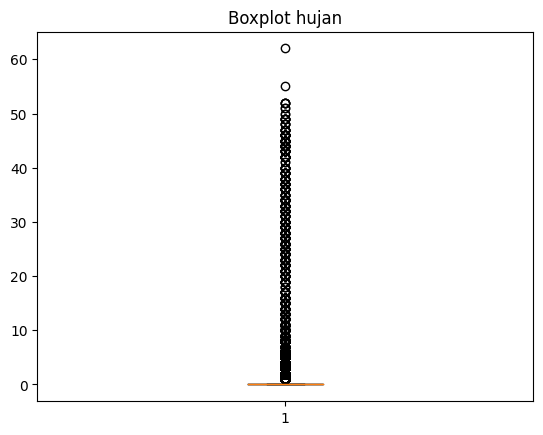

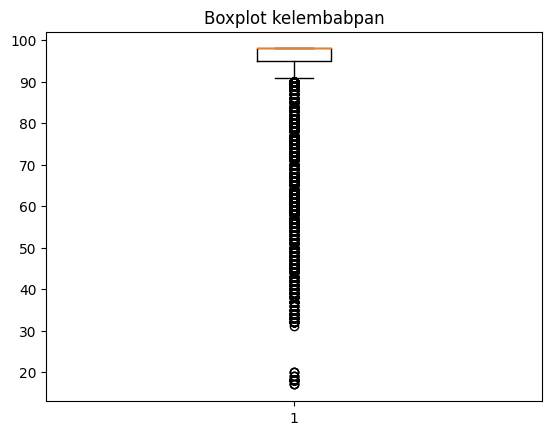

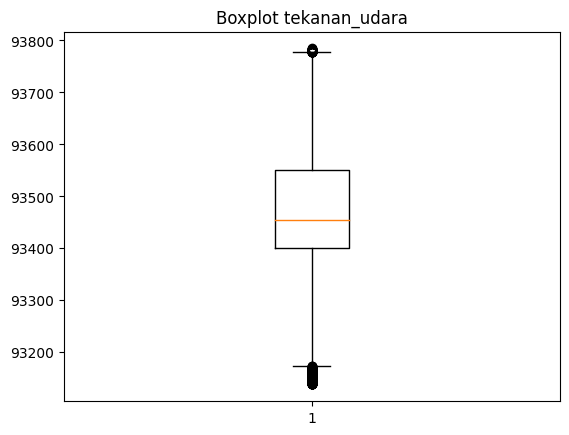

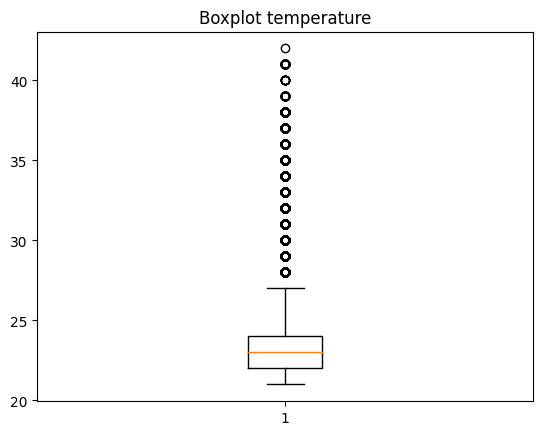

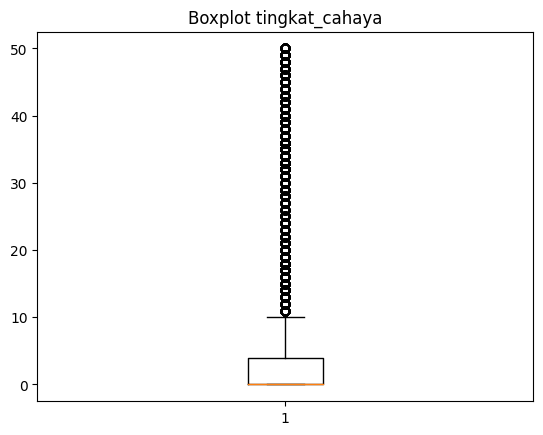

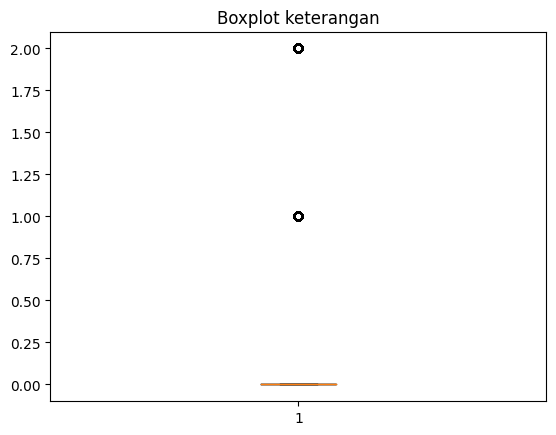

In [17]:
kolom = ['hujan','kelembabpan','tekanan_udara', 'temperature', 'tingkat_cahaya','keterangan']

for i in kolom:
    plt.boxplot(weather[i])
    plt.title("Boxplot " + i)
    plt.show()

In [18]:
# Mencari nilai Q! dan Q3
Q1 = weather.quantile(0.25)
Q3 = weather.quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah (threshold) dengan menggunakan nilai IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Menggunakan perulangan untuk membersihkan nilai outliers
for col in weather.columns[:-1]:
    data = weather[(weather[col] >= lower_limit[col]) & (weather[col] <= upper_limit[col])]

# Menampilkan data setelah nilai outliers dibersihkan
data

,hujan,kelembabpan,tekanan_udara,temperature,tingkat_cahaya,keterangan
0,0,98,93657.02,23,0,0
1,0,98,93656.45,23,0,0
2,0,98,93656.99,23,0,0
3,0,98,93656.55,23,0,0
4,0,98,93657.02,23,0,0
...,...,...,...,...,...,...
49303,0,98,93613.57,23,0,0
49304,0,98,93613.58,23,0,0
49305,0,98,93613.53,23,0,0
49306,0,98,93613.22,23,0,0


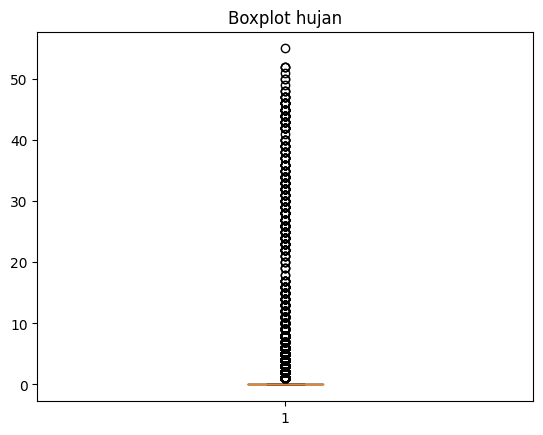

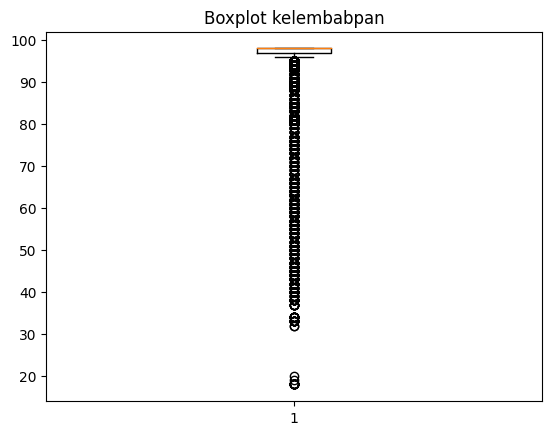

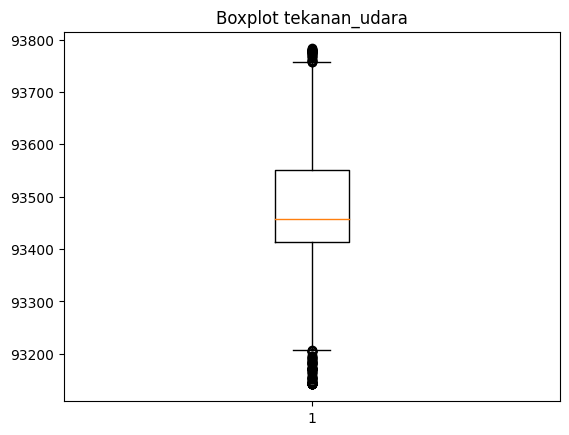

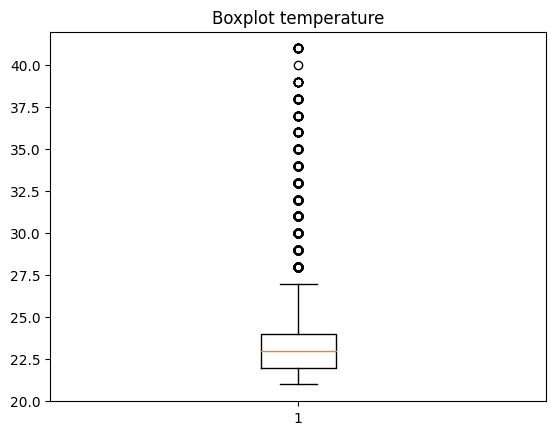

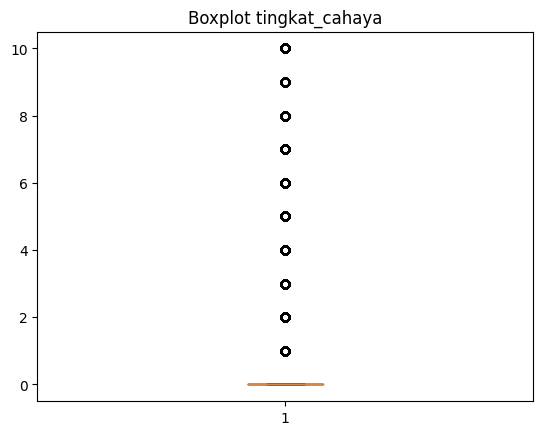

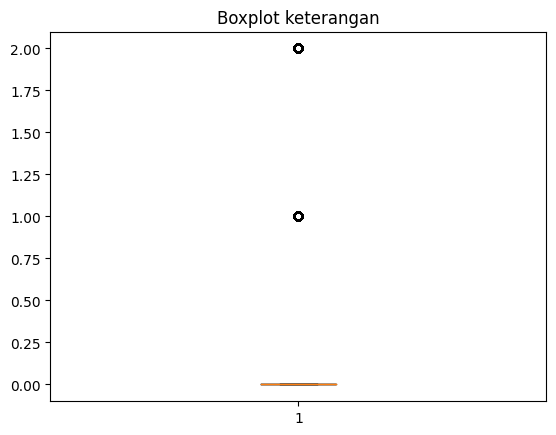

In [19]:
kolom = ['hujan','kelembabpan','tekanan_udara', 'temperature', 'tingkat_cahaya','keterangan']

for i in kolom:
    plt.boxplot(data[i])
    plt.title("Boxplot " + i)
    plt.show()

## EDA

<Axes: ylabel='count'>

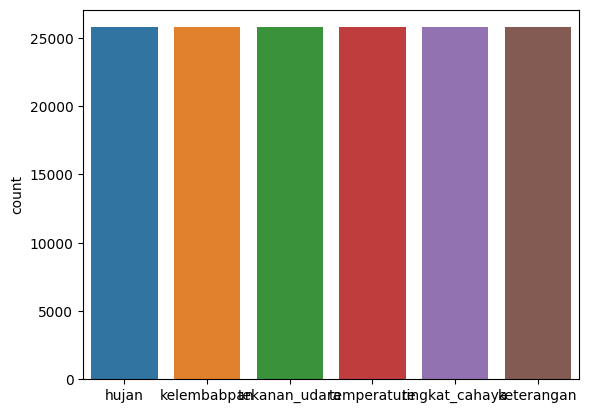

In [20]:
sns.countplot(weather)

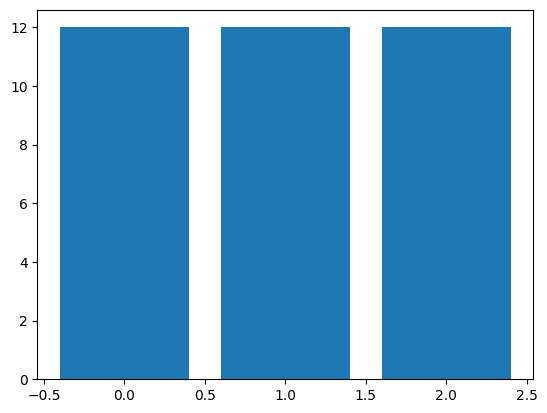

In [21]:
plt.bar(weather['keterangan'],height=12)    
plt.show()

<Axes: >

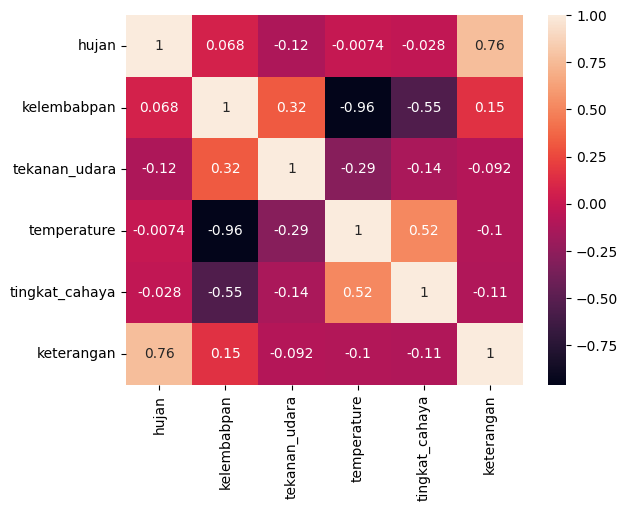

In [22]:
corr = weather.corr()
sns.heatmap(corr,annot=True)

In [23]:
from imblearn.over_sampling import SMOTE

X = data.drop(['keterangan'],axis=1)
y = data['keterangan']
# Buat objek SMOTE
sm = SMOTE(random_state=42)

# Resample data menggunakan SMOTE
X_res, y_res = sm.fit_resample(X, y)

In [24]:
X_res

,hujan,kelembabpan,tekanan_udara,temperature,tingkat_cahaya
0,0,98,93657.020000,23,0
1,0,98,93656.450000,23,0
2,0,98,93656.990000,23,0
3,0,98,93656.550000,23,0
4,0,98,93657.020000,23,0
...,...,...,...,...,...
51109,11,98,93410.046590,23,0
51110,25,98,93400.819806,23,0
51111,16,98,93402.768445,23,0
51112,29,98,93553.519656,23,0


In [25]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
51109    2
51110    2
51111    2
51112    2
51113    2
Name: keterangan, Length: 51114, dtype: int32

In [26]:
data = pd.concat([X_res,y_res],axis=1)
data

,hujan,kelembabpan,tekanan_udara,temperature,tingkat_cahaya,keterangan
0,0,98,93657.020000,23,0,0
1,0,98,93656.450000,23,0,0
2,0,98,93656.990000,23,0,0
3,0,98,93656.550000,23,0,0
4,0,98,93657.020000,23,0,0
...,...,...,...,...,...,...
51109,11,98,93410.046590,23,0,2
51110,25,98,93400.819806,23,0,2
51111,16,98,93402.768445,23,0,2
51112,29,98,93553.519656,23,0,2


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
# Misalkan data yang digunakan tersimpan dalam variabel X dan target variabel y
X = data.drop(['keterangan'],axis=1)
y = data['keterangan']
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek model Random Forest
rf = RandomForestClassifier()

# Melatih model pada data training
rf.fit(X_train, y_train)

# Memprediksi target variabel pada data testing
y_pred = rf.predict(X_test)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       1.00      1.00      1.00      3428
           2       1.00      1.00      1.00      3332

    accuracy                           1.00     10223
   macro avg       1.00      1.00      1.00     10223
weighted avg       1.00      1.00      1.00     10223



In [28]:
# joblib.dump(rf, '/weather_station/models/model.pkl')

In [29]:
weather['tingkat_cahaya'].unique()

array([ 0,  1,  2,  3,  4,  5,  8,  7,  6, 10,  9, 14, 13, 12, 11, 18, 17,
       16, 15, 22, 21, 20, 19, 29, 28, 27, 26, 25, 24, 23, 35, 34, 33, 32,
       31, 30, 41, 40, 39, 38, 37, 36, 48, 47, 46, 45, 44, 43, 42, 49, 50],
      dtype=int64)

In [30]:
weather['hujan'].unique()

array([ 0,  1,  2,  6,  4,  3,  7,  5, 24, 23, 22, 21, 20, 55, 52, 51, 50,
       37, 36, 34, 33, 32, 26, 19, 17, 18, 47, 44, 28, 27, 62, 49, 48, 45,
       40, 39, 16, 15, 14, 13, 42, 38, 46, 41, 35, 30,  8, 12, 43, 31, 29,
       25, 11, 10,  9], dtype=int64)

In [31]:
weather['kelembabpan'].unique()

array([98, 97, 96, 95, 94, 93, 91, 90, 88, 89, 86, 85, 84, 83, 82, 81, 80,
       79, 78, 76, 77, 74, 73, 72, 75, 71, 70, 69, 68, 67, 66, 65, 64, 62,
       63, 61, 60, 58, 57, 56, 54, 55, 53, 52, 51, 50, 48, 47, 45, 46, 49,
       44, 43, 59, 87, 92, 40, 42, 41, 39, 38, 37, 35, 36, 34, 33, 32, 31,
       18, 17, 19, 20], dtype=int64)

In [32]:
weather['temperature'].unique()

array([23, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 37,
       39, 40, 41, 42, 21], dtype=int64)

In [33]:
weather['tekanan_udara'].unique()

array([93657.02, 93656.45, 93656.99, ..., 93613.53, 93613.22, 93612.99])

In [34]:
weather['keterangan'].unique()

array([0, 2, 1])